# Introducción al Machine Learning - Semana 4
## Caso: Implementación de modelos no lineales aditivos en un problema de regresión

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos no lineales aditivos y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos MARS y GAM.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:  

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos]

Estimación de modelos lineales: Se estiman los tres modelos lineales solicitados, se evalúan en test y se concluye correctamente qué modelo tiene mayor capacidad predictiva. [10 puntos]

Estimación del modelo MARS: Se estima el modelo MARS correctamente [15 puntos]

Interpretación de predictores MARS: Se interpretan al menos tres predictores en el modelo MARS y no se presentan errores en este análisis. [15 puntos]

Estimación del modelo GAM: Se estima el modelo GAM correctamente [10 puntos]

Interpretación de predictores GAM: Se interpretan los mismos predictores que en el modelo MARS y no presenta errores en su análisis. [10 puntos]

Conclusión sobre la primera hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos]

Conclusión sobre la segunda hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos]

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos]

### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Carseats", la cual contiene 10 variables predictivas. De esta manera, el objetivo de la actividad es predecir la variable de ventas "Sales".

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-carseats


### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

# librerias basicas
import pandas as pd
import numpy as np
# librerias de visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
# librerias para modelos y validacion
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score

df_carseats = pd.read_csv('Carseats.csv')
df_carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
XTotal = df_carseats.drop('Sales', axis=1) # Variables predictoras
yTotal = df_carseats['Sales'] # Variable objetivo

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)
df_xtrain = pd.DataFrame(XTrain) # Dataframe con datos de entrenamiento para analisis preliminar
df_ytrain = pd.DataFrame(yTrain) # Dataframe con datos de variable objetivo para analisis preliminar

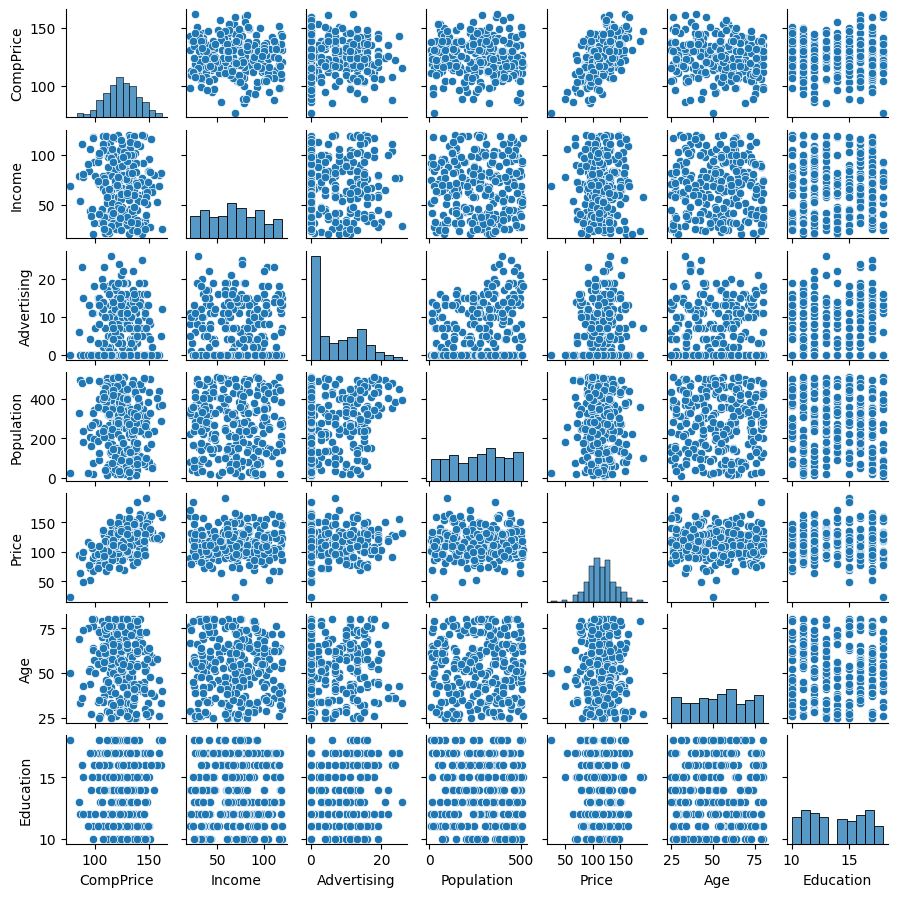

In [ ]:
# Correlograma de variables predictoras
sns.pairplot(df_xtrain, kind='scatter', height=1.3)
plt.show()

Se puede ver que las únicas variables que tienen correlación son **"Price"** y **"ComPrice"** que hacen referencia al precio del artículo y el precio que ofrece la competencia respectivamente.

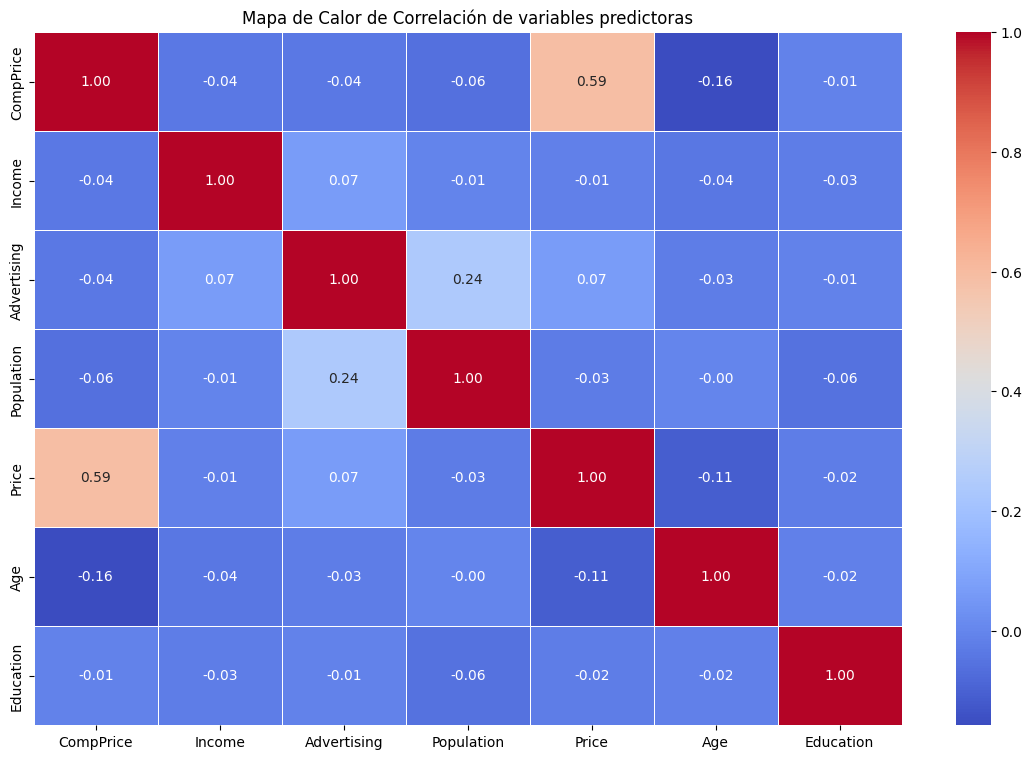

In [ ]:
# Mapa de calor
correlation_matrix = df_xtrain[['CompPrice','Income','Advertising','Population','Price','Age','Education']].corr()
plt.figure(figsize=(14,9))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación de variables predictoras")
plt.show()

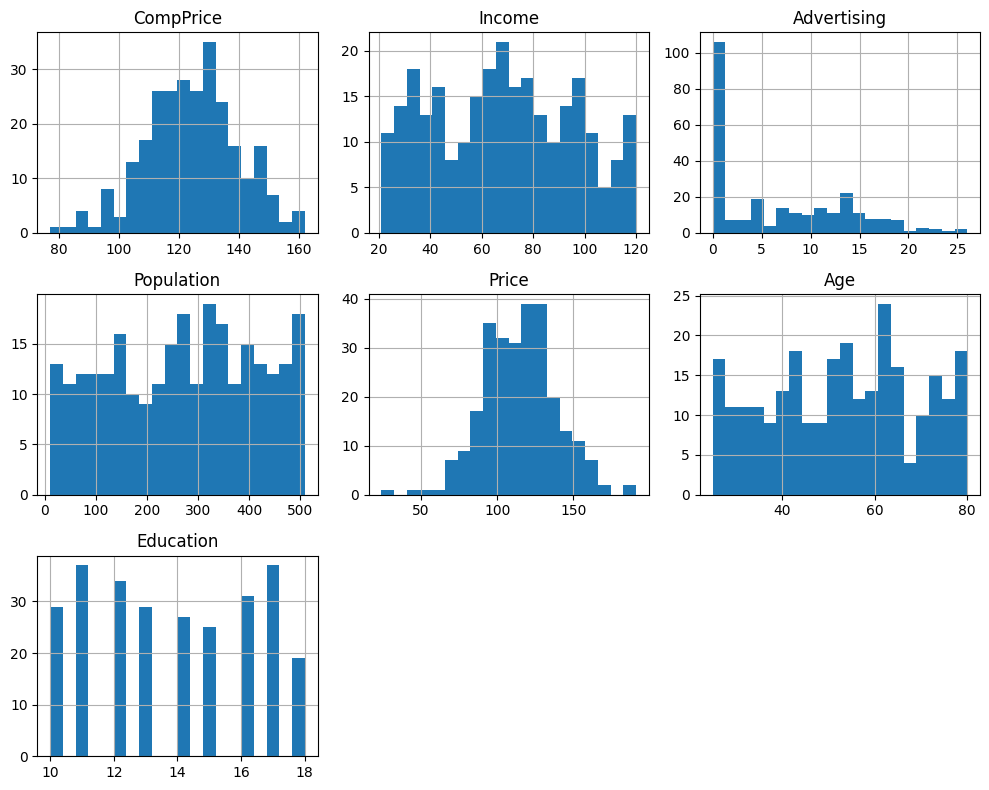

In [ ]:
# Histograma de variables predictoras
df_xtrain.hist(bins=20, figsize=(10, 8))
plt.tight_layout()  # asegurarse de que las subgráficas no se solapen
plt.show()

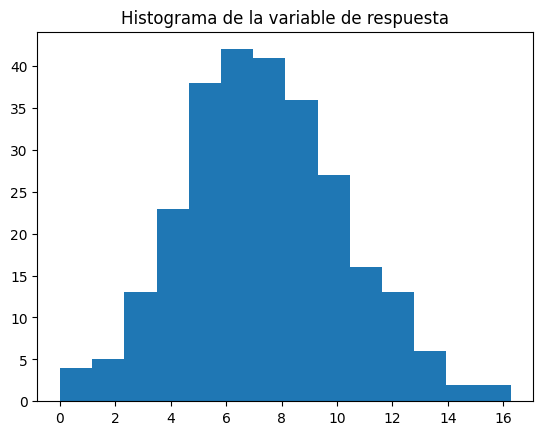

In [ ]:
### Histograma de variable de respuesta
plt.hist(df_ytrain, bins='auto')
plt.title('Histograma de la variable de respuesta')
plt.show()

In [ ]:
# Estadisticas descriptivas de variables predictoras
print(df_xtrain.describe())

        CompPrice      Income  Advertising  Population       Price  \
count  268.000000  268.000000   268.000000  268.000000  268.000000   
mean   124.279851   68.361940     6.675373  270.682836  115.164179   
std     15.413406   27.420426     6.871413  145.039631   23.874106   
min     77.000000   21.000000     0.000000   10.000000   24.000000   
25%    114.750000   44.000000     0.000000  145.500000   98.000000   
50%    124.000000   69.000000     5.000000  279.000000  115.000000   
75%    135.000000   91.000000    12.000000  396.500000  130.250000   
max    162.000000  120.000000    26.000000  509.000000  191.000000   

              Age   Education  
count  268.000000  268.000000  
mean    53.082090   13.813433  
std     15.956189    2.551838  
min     25.000000   10.000000  
25%     40.750000   12.000000  
50%     54.000000   14.000000  
75%     65.000000   16.000000  
max     80.000000   18.000000  


In [ ]:
# Estadisticas descriptivas de variable de respuesta
print(df_ytrain.describe())

            Sales
count  268.000000
mean     7.372164
std      2.922597
min      0.000000
25%      5.302500
50%      7.410000
75%      9.165000
max     16.270000


#### **Procedimiento**

Se cargó el conjunto de datos carseats.csv utilizando pandas. A continuación, se separaron las variables predictoras, que se almacenaron en la variable XTotal, mientras que la variable objetivo (Sales) se almacenó en yTotal. Luego, los datos se dividieron en un conjunto de entrenamiento y uno de prueba utilizando train_test_split, destinando el 33% de los datos para la prueba y el resto para el entrenamiento.



#### **Análisis y conclusiones**

Las estadísticas descriptivas indican que las variables predictoras no presentan correlaciones significativas entre sí. Sin embargo, se observó una correlación moderada entre las variables comprice y price. Al analizar estas variables, se concluye que las demás variables no presentan correlaciones importantes, lo que sugiere que no hay redundancia significativa entre ellas.

Los histogramas, junto con las estadísticas descriptivas, revelaron que las variables predictoras tienen distribuciones variadas: algunas son más centradas, mientras que otras son más dispersas.

Por otro lado, la variable a predecir, Sales, muestra una distribución equilibrada, con valores que van desde 0 hasta 16 y una desviación estándar pequeña de 2.9.

Dado que la variable Sales está equilibrada, no es necesario realizar un ajuste en el balance de clases. Esto es favorable, ya que garantiza que los modelos no estén sesgados hacia ninguna clase en particular.

### 2. Estimación de modelos lineales  (10 puntos)
Encuentren el modelo lineal que mejor predice la variable "Sales" entre Lasso, PCA, PLS. Para esto, estimen los modelos usando la muestra de entrenamiento y evalúen el poder predictivo en la muestra de test. Describan su procedimiento y analicen los resultados.

#### PCA

Nota: aplicaré PCA utilizando PCA solo con las variables numéricas y luego agregar las variables categóricas a la regresión

In [ ]:
# dividir categoricas de numericas
XTrain_categoricas = XTrain[['ShelveLoc','Urban','US']]
XTrain_numericas = XTrain[['CompPrice','Income','Advertising','Population','Price','Age','Education']]


# Escalar las variables numericas
# crear el objeto
scaler = StandardScaler()
# ajustar el objeto y transfomar
XTrain_numericas_escalado = scaler.fit_transform(XTrain_numericas)

In [ ]:
# obtener la matriz A que aplica la transformacion lineal sobre X para obtener Z

p = len(XTrain_numericas_escalado[0])
# crear el objeto
pca = PCA(n_components=p)
# ajustar el objeto
pca.fit(XTrain_numericas_escalado)
# obtener A
A = pca.components_

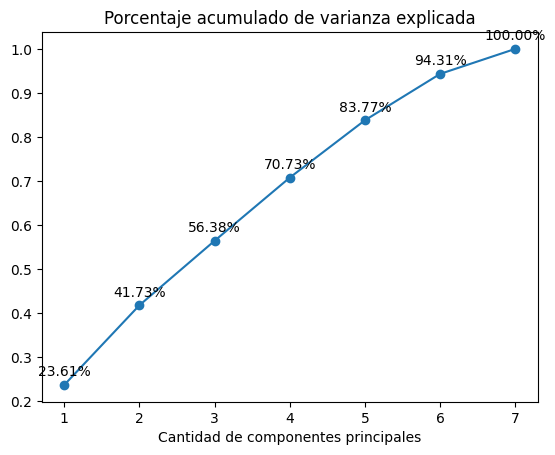

In [ ]:
# graficar la varianza explicada por los componentes para saber cuántos elegir

porcentajeVarianzaExplicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(porcentajeVarianzaExplicada)
plt.plot(range(1,p+1), varianza_acumulada, marker = 'o')

for i, v in enumerate(varianza_acumulada):
    plt.text(i + 1, v + 0.02, f"{v:.2%}", ha='center', fontsize=10)

plt.xlabel('Cantidad de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

Se optó por elegir 6 componentes principales ya que estos son los que explican más del 90% de la varianza.

In [ ]:
nComponentesElegidas = 6

# multiplicación de matrices, recordando que Z = X*A
ZTotalTrain = np.matmul(XTrain_numericas_escalado,A)

# Z train con unicamente los componentes seleccionados
ZTrain = ZTotalTrain[:,range(0,nComponentesElegidas)]


In [ ]:
# ajustar el modelo con los componentes elegidos y las variables categoricas
# convertir a numericas las categoricas
XTrain_categoricas_encoded = pd.get_dummies(XTrain[['ShelveLoc', 'Urban', 'US']], drop_first=True)

# combinarlas
XTrain_combinadas = np.concatenate((ZTrain, XTrain_categoricas_encoded), axis=1)
print(XTrain_combinadas[0])

# hacer la regresion
# crear el objeto
regPCA = LinearRegression()
# ajustarlo (fit)
regPCA.fit(XTrain_combinadas, yTrain)


[ 1.18356602 -1.37213103  0.82362069  1.16391463 -1.16208634 -0.78721622
  0.          1.          1.          0.        ]


LinearRegression()

In [ ]:
# antes de probar el modelo en test, se deben hacer las mismas transformamciones a las variables X

# separar numericas de categoricas
XTest_numericas = XTest[['CompPrice','Income','Advertising','Population','Price','Age','Education']]
XTest_categoricas = XTest[['ShelveLoc','Urban','US']]

# escalar las variables numericas
XTest_numericas_escalado = scaler.transform(XTest_numericas)

# multiplicar XTest escaladas por A para obtener Z, Z = X*A
ZTotalTest = np.matmul(XTest_numericas_escalado,A)
# quedarse unicamente con los componentes elegidos
ZTest = ZTotalTest[:,range(0,nComponentesElegidas)]

# transformar las categoricas
XTest_categoricas_encoded = pd.get_dummies(XTest[['ShelveLoc', 'Urban', 'US']], drop_first=True)

# combinar XTest categoricas y numericas
XTest_combinadas_pca = np.concatenate((ZTest, XTest_categoricas_encoded), axis=1)

# hacer las predicciones
prediccionesPCA1 = regPCA.predict(XTest_combinadas_pca)

MSEPCA=np.average(np.square(prediccionesPCA1-yTest))
print('MSE regresión por componentes principales:')
print(MSEPCA)

MSE regresión por componentes principales:
1.783386737631392


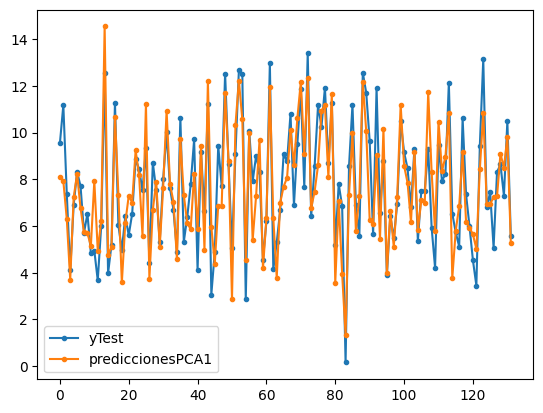

In [ ]:
# crear una grafica para ver predicciones vs reales
ejeX = np.arange(0,len(yTest))
plt.plot(ejeX, yTest, label='yTest', marker = 'o', markersize = '3')
plt.plot(ejeX, prediccionesPCA1, label='prediccionesPCA1', marker = 'o', markersize = '3')
plt.legend()
plt.show()

#### PLS

In [ ]:
# para aplicar PLS, se van a tomar las variables estandarizadas X numericas
# al igual que las variables codificadas X categoricas

# se van a combinar ambas transformaciones y se va a ajustar el modelo
XTrain_combinadas_pls = np.concatenate((XTrain_numericas_escalado, XTrain_categoricas_encoded), axis=1)

# crear el objeto
pls = PLSRegression(n_components=p)
# ajustar (fit)
pls.fit(XTrain_combinadas_pls, yTrain)

PLSRegression(n_components=7)

In [ ]:
# para predecir primero hay que transformar las X de test como se hizo con el train
XTest_combinadas_pls = np.concatenate((XTest_numericas_escalado, XTest_categoricas_encoded), axis=1)

# predecir
prediccionesPLS = pls.predict(XTest_combinadas_pls)
prediccionesPLS=np.hstack(prediccionesPLS)

In [ ]:
MSEPLS=np.average(np.square(prediccionesPLS-yTest))
print('MSE regresión por partial least squares:')
print(MSEPLS)

MSE regresión por partial least squares:
1.266118848675583


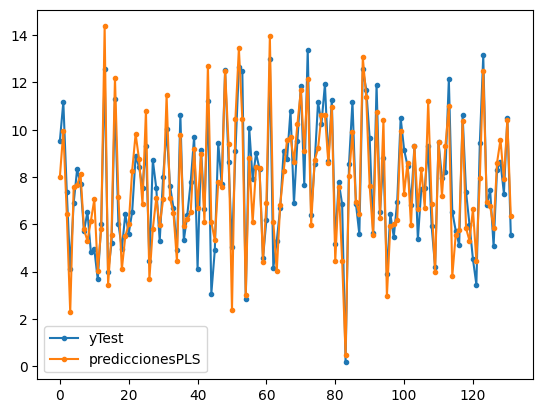

In [ ]:
# crear una grafica para ver predicciones vs reales
ejeX = np.arange(0,len(yTest))
plt.plot(ejeX, yTest, label='yTest', marker = 'o', markersize = '3')
plt.plot(ejeX, prediccionesPLS, label='prediccionesPLS', marker = 'o', markersize = '3')
plt.legend()
plt.show()

#### Lasso

In [ ]:
# para lasso también se etomará en cuenta las variables X estandarizadas y las X categoricas codificadas
XTrain_combinadas_lasso = np.concatenate((XTrain_numericas_escalado, XTrain_categoricas_encoded), axis=1)

# definir la cantida de alphas que se van a probar
n_alphas = 200
# definir el array de alphas
alphasCalibrar = np.logspace(-10, 1, n_alphas)

# crear el objeto
modeloLASSO = LassoCV(alphas=alphasCalibrar)
# ajustarlo (fit)
modeloLASSO.fit(XTrain_combinadas_lasso, yTrain)

# antes de crear predicciones en XTest se les tiene que aplicar las mismas transformaciones que XTrain
XTest_combinadas_lasso = np.concatenate((XTest_numericas_escalado, XTest_categoricas_encoded), axis=1)

# predicciones
prediccionesLASSO = modeloLASSO.predict(XTest_combinadas_lasso)
MSELASSO=np.average(np.square(prediccionesLASSO-yTest))
print('MSE regresión por Lasso:')
print(MSELASSO)

MSE regresión por Lasso:
1.2456748660509611


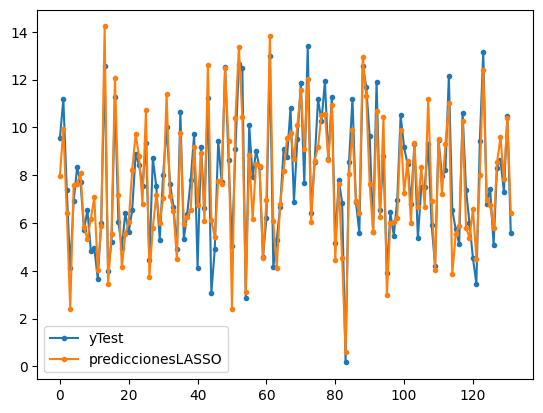

In [ ]:
# crear una grafica para ver predicciones vs reales
ejeX = np.arange(0,len(yTest))
plt.plot(ejeX, yTest, label='yTest', marker = 'o', markersize = '3')
plt.plot(ejeX, prediccionesLASSO, label='prediccionesLASSO', marker = 'o', markersize = '3')
plt.legend()
plt.show()

#### Comparación de los 3 modelos lineales

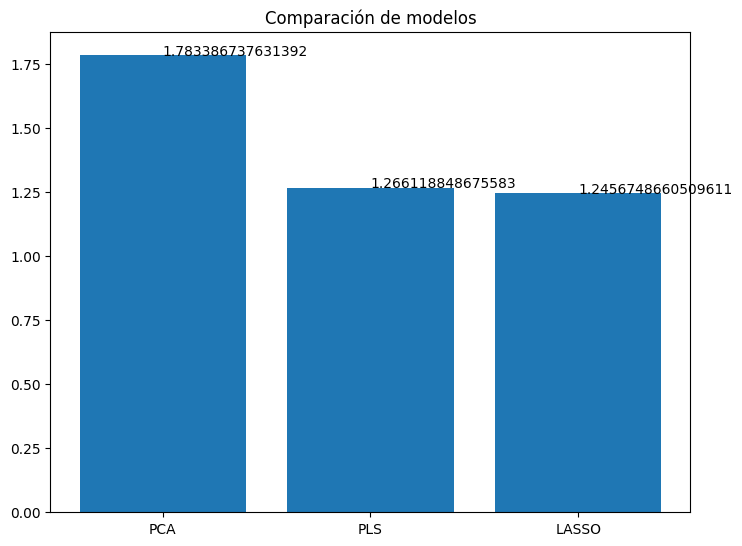

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['PCA', 'PLS','LASSO']
ejeY = [MSEPCA,MSEPLS,MSELASSO]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

#### **Procedimiento y Análisis**
Se lleva a cabo la estimación utilizando PCA, PLS y LASSO. En el caso de PCA, se seleccionan 6 componentes principales, las cuales explican más del 90% de la varianza.

Tras ejecutar los modelos y calcular el Error Cuadrático Medio (MSE), se comparan los resultados obtenidos:

* PCA: 1.78
* PLS: 1.26
* LASSO: 1.24

El modelo que obtuvo el menor MSE y, por lo tanto, el mejor desempeño, fue LASSO.

### 3. Estimación del modelo MARS e interpretación de predictores (30 puntos)
3.a) Estimen un modelo MARS para predecir la variable "Sales". (15 puntos)

3.b) Interpreten el efecto de al menos 3 predictores. (15 puntos)

Rep
3.a) Estimacion del modelo MARS para predecir la veriable de ventas.
Se implemento un MARS en R. El modelo fue entrenado con el conjunto de datos Carseats, donde nos enfocamos en estudiar la variable Sales y las variables predictoras incluyes caracteristicas como Prices, advertising, Income, entre otras.

El dataset se dividio en 67% para entrenamiento y el 33% de prueba, asegurando una evaluacion justa del desempeño.

In [ ]:


# if (!require("earth")) install.packages("earth", dependencies=TRUE)
# if (!require("ISLR")) install.packages("ISLR", dependencies=TRUE)
# if (!require("ggplot2")) install.packages("ggplot2", dependencies=TRUE)

# library(earth)
# library(ISLR)
# library(ggplot2)

# data(Carseats)  # Cargar la base de datos

# head(Carseats)

# # Convertir variables categóricas en numéricas para que el modelo las entienda
# Carseats$ShelveLoc <- as.numeric(factor(Carseats$ShelveLoc, levels = c("Bad", "Medium", "Good")))
# Carseats$Urban <- as.numeric(factor(Carseats$Urban, levels = c("No", "Yes"))) - 1
# Carseats$US <- as.numeric(factor(Carseats$US, levels = c("No", "Yes"))) - 1

# # Ver la estructura después de la conversión
# str(Carseats)

# set.seed(123)
# train_index <- sample(seq_len(nrow(Carseats)), size = floor(0.67 * nrow(Carseats)))

# train_data <- Carseats[train_index, ]  # Datos de entrenamiento (67%)
# test_data <- Carseats[-train_index, ]  # Datos de prueba (33%)

# # Mostrar el tamaño de los datos de entrenamiento y prueba
# cat("Tamaño de los datos de entrenamiento:", nrow(train_data), "\n")
# cat("Tamaño de los datos de prueba:", nrow(test_data), "\n")

# #Modelo MARS
# mars_model <- earth(Sales ~ ., data = train_data, degree = 1)
# summary(mars_model)  # Ver detalles del modelo

# # Evaluar la importancia de las variables
# cat("Importancia de los predictores:\n")
# print(evimp(mars_model))

# # Hacer predicciones en los datos de prueba
# predictions <- predict(mars_model, test_data)

# # Calcular el error cuadrático medio (MSE)
# mse_mars <- mean((predictions - test_data$Sales)^2)

# # Mostrar el MSE en consola
# cat("Error cuadrático medio (MSE) en test:", round(mse_mars, 4), "\n")

# # Comparación de 4 predictores clave: Price, Advertising, ShelveLoc e Income

# # 1. Relación entre Precio y Ventas
# ggplot(Carseats, aes(x = Price, y = Sales)) +
#   geom_point(alpha = 0.6, color = "blue") +
#   geom_smooth(method = "lm", se = FALSE, color = "darkblue") +
#   labs(title = "Efecto del Precio en las Ventas", x = "Precio", y = "Ventas") +
#   theme_minimal()

# # 2. Relación entre Gasto en Publicidad y Ventas
# ggplot(Carseats, aes(x = Advertising, y = Sales)) +
#   geom_point(alpha = 0.6, color = "red") +
#   geom_smooth(method = "lm", se = FALSE, color = "darkred") +
#   labs(title = "Efecto de la Publicidad en las Ventas", x = "Publicidad", y = "Ventas") +
#   theme_minimal()

# # 3. Impacto de la Ubicación del Producto en las Ventas
# ggplot(Carseats, aes(x = factor(ShelveLoc), y = Sales, fill = factor(ShelveLoc))) +
#   geom_boxplot() +
#   labs(title = "Impacto de la Ubicación en las Ventas",
#        x = "ShelveLoc (1: Malo, 2: Medio, 3: Bueno)", y = "Ventas") +
#   scale_fill_manual(values = c("lightcoral", "lightblue", "lightgreen")) +
#   theme_minimal()

# # 4. Relación entre Ingreso y Ventas
# ggplot(Carseats, aes(x = Income, y = Sales)) +
#   geom_point(alpha = 0.6, color = "purple") +
#   geom_smooth(method = "lm", se = FALSE, color = "orange") +
#   labs(title = "Efecto del Ingreso en las Ventas", x = "Ingreso", y = "Ventas") +
#   theme_minimal()


3.b) A continuacion, se analiza el impacto de tres predictores clave en la variable de Ventas, basado en la importancia de variables obtenida del modelo:

3.b.1) Precio/Price: Se observa una relacion negativa entre el precio y las ventas, siendo asi que cuando el precio aumenta las ventas disminuyes y es un comportamiento esperado.

3.b.2) Publicidad/Advertaising: La relacion es positiva entre la inversion en publicidad y las ventas.  La estrategia de marketing tiene un impacto directo en el rendimiento del producto.

3.b.3) Ingreso/Income: La relacion es levemente psoitiva, lo cual es una comportamiento esperado

3.b.4) Ubicacion/ShelveLoc: Este es un predictor muy importante en las ventas, los productos con mejor ubicacion muestran un mayor nivel de ventas en comparacion con los que tienen una ubicacion menos favorable.


### 4. Estimación del modelo GAM e interpretación de predictores (40 puntos)
4.a) Estimen un modelo GAM para predecir la variable "Sales". (10 puntos)

4.b) Interpreten el efecto de los mismos 3 predictores que interpretaron en MARS. ¿Coinciden los
efectos? (10 puntos)

4.c) Prueben la teoría que afirma que las variables "Price" y "Population" no deben ser incluidas en el modelo. (10 puntos)

4.d) Prueben la teoría que afirma que el efecto de la variable "Income" debe ser lineal. (10 puntos)

#### 4a) Estimar modelo GAM

**PROCEDIMIENTO**

Se inicia el modelo cargando las librerias necesarias.

In [ ]:
!pip install pygam
from pygam import LinearGAM, s, f, l
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

**1. Carga y preparación de datos**

1.	Se lee el archivo Carseats.csv y se almacena en el DataFrame df.
2.	Se codifican las variables categóricas ‘ShelveLoc‘,‘Urban‘,‘US‘`ShelveLoc`, `Urban`, `US`‘ShelveLoc‘,‘Urban‘,‘US‘ usando LabelEncoder; esto convierte categorías como Yes/No o Bad/Medium/Good en números (0, 1, 2, etc.).
3.	Se define la variable objetivo Y = df['Sales'] y el conjunto de predictores X, quitando la columna de ventas del dataset.
4.	Se hace la división en entrenamiento y prueba con train_test_split, quedando un 80% para entrenamiento y 20% para prueba.

In [ ]:
# ================================================
# PASO 1: CARGAR Y PREPARAR LOS DATOS
# ================================================

# Cargar dataset Carseats

df = pd.read_csv('Carseats.csv')

# Revisar brevemente
# print(df.head())

# Variables:
# 0: CompPrice     (num)
# 1: Income        (num)
# 2: Advertising   (num)
# 3: Population    (num)
# 4: Price         (num)
# 5: ShelveLoc     (categoría: 'Bad','Medium','Good')
# 6: Age           (num)
# 7: Education     (num)
# 8: Urban         (categoría: 'Yes','No')
# 9: US            (categoría: 'Yes','No')
# (Sales es la variable objetivo)

# Codificar variables categóricas
label_shelve = LabelEncoder()
df['ShelveLoc'] = label_shelve.fit_transform(df['ShelveLoc'])  # 0..2

label_urban = LabelEncoder()
df['Urban'] = label_urban.fit_transform(df['Urban'])          # 0..1

label_us = LabelEncoder()
df['US'] = label_us.fit_transform(df['US'])                   # 0..1

# Definir X e y
X = df.drop('Sales', axis=1)
Y = df['Sales']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# ================================================
# Función para calcular AIC manualmente
# ================================================

def myAIC(gam_model):
    # AIC = 2 * edof - 2 * loglikelihood
    edof = gam_model.statistics_['edof']
    loglik = gam_model.statistics_['loglikelihood']
    return 2*edof - 2*loglik

**2. Definición del Modelo GAM**

Se usan splines suaves s(...) para las variables numéricas:

CompPrice (col 0)
Income (col 1)
Advertising (col 2)
Population (col 3)
Price (col 4)
Age (col 6)
Education (col 7)
Se usan factores f(...) para las variables categóricas:

ShelveLoc (col 5)
Urban (col 8)
US (col 9)
El modelo completo queda así:

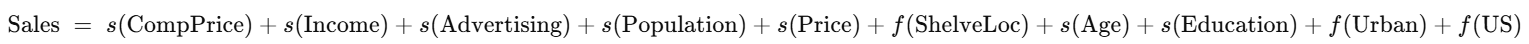

In [ ]:
# ================================================
# PASO 2: ESPECIFICAR MODELO GAM
# ================================================
# La columna 0: CompPrice -> s(0)
#             1: Income   -> s(1)  (o l(1) si queremos lineal)
#             2: Advertising -> s(2)
#             3: Population  -> s(3)
#             4: Price       -> s(4)
#             5: ShelveLoc   -> f(5)  (categórica 0..2)
#             6: Age         -> s(6)
#             7: Education   -> s(7)
#             8: Urban       -> f(8)  (categórica 0..1)
#             9: US          -> f(9)  (categórica 0..1)

# Modelo completo con efectos suaves para numéricos y factores para categóricos
gam = LinearGAM(
    s(0) +  # CompPrice
    s(1) +  # Income
    s(2) +  # Advertising
    s(3) +  # Population
    s(4) +  # Price
    f(5) +  # ShelveLoc
    s(6) +  # Age
    s(7) +  # Education
    f(8) +  # Urban
    f(9)    # US
).fit(X_train, y_train)


**3. Resultados del modelo**

Al ejecutar gam.summary() se muestra un resumen con:

* Intercept: el intercepto estimado.
* edf: grados de libertad efectivos de cada spline o factor.
* GCV, scale: estimaciones de la varianza residual y criterios de ajuste.
* deviance explained: porcentaje de varianza explicada por el modelo.

In [ ]:
# ================================================
# PASO 3: RESULTADOS DEL MODELO COMPLETO
# ================================================
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     73.2326
Link Function:                     IdentityLink Log Likelihood:                                  -412.5953
Number of Samples:                          320 AIC:                                              973.6557
                                                AICc:                                            1019.2884
                                                GCV:                                                1.6286
                                                Scale:                                              0.9754
                                                Pseudo R-Squared:                                   0.8985
Feature Function                  Lam

<ipython-input-27-72f3ca3f2cd3>:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


**4. Modelo GAM**

Justo el bloque anterior describe cómo se estimó el GAM completo (col 0..9, con sus splines o factores). Ese es el cumplimiento de la parte 4.a de la consigna.

#### 4b) Interpretación de 3 predictores

**Interpretación de tres predictores**

En el código, se generan Partial Dependence Plots para estas variables:

Price (col=4)
Income (col=1)
Advertising (col=2)
Estos gráficos muestran cómo cambia la predicción de Sales a medida que Price (por ejemplo) varía en su rango, manteniendo el resto de variables fijas.

Price:

Suele esperarse una relación negativa: a mayor precio, tienden a bajar las ventas. En el Partial Dependence, se vería una curva descendente (o al menos con tendencia negativa) cuando el precio sube.
Income:

Usualmente, las ventas aumentan cuando los consumidores tienen más ingreso disponible. Se espera una curva con pendiente positiva o incluso no lineal (por ejemplo, saturándose a ingresos muy altos).
Advertising:

Se espera que gastar más en publicidad incremente las ventas. Nuevamente, la dependencia parcial debe mostrar un comportamiento positivo con la inversión publicitaria.
¿Coinciden con el modelo MARS?

Probablemente sí, pues en MARS también habría aparecido un efecto inverso con Price, y efectos positivos con Income y Advertising. La diferencia es que GAM permite una forma más flexible (curvas suaves) en lugar de segmentos lineales.

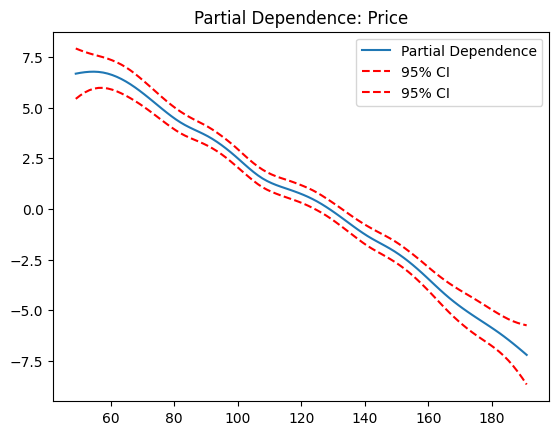

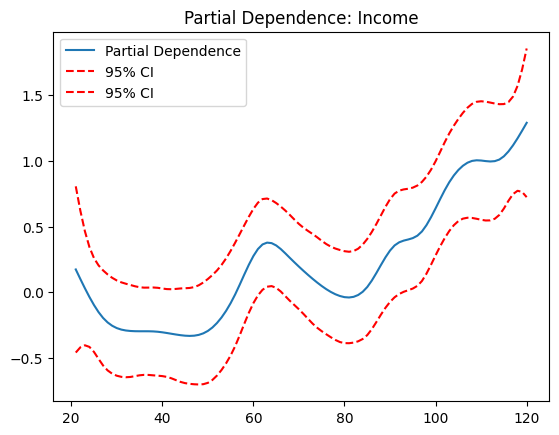

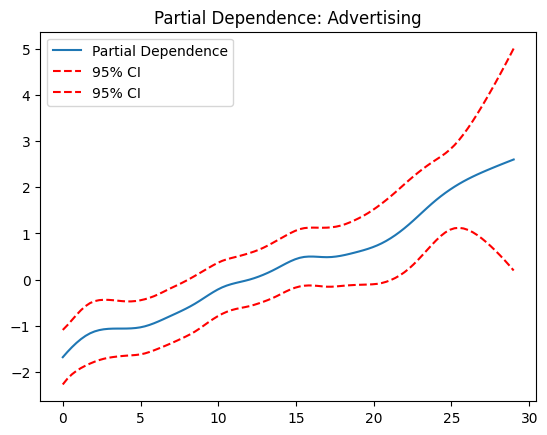

In [ ]:
# ================================================
# PASO 4.b) INTERPRETAR EFECTOS DE PRICE, INCOME, ADVERTISING
# ================================================
# Price -> Columna 4, Income -> Columna 1, Advertising -> Columna 2

for col in [4, 1, 2]:
    plt.figure()
    # Generar grilla para la variable "col"
    XX = gam.generate_X_grid(term=col)

    pd_vals = gam.partial_dependence(term=col, X=XX)
    pd_conf = gam.partial_dependence(term=col, X=XX, width=0.95)

    plt.plot(XX[:, col], pd_vals, label='Partial Dependence')
    plt.plot(XX[:, col], pd_conf[1], c='r', ls='--', label='95% CI')
    plt.title(f'Partial Dependence: {X.columns[col]}')
    plt.legend()
    plt.show()

#### 4c) Excluir Price y Population

**Exclusión de Price y Population**

Aquí se entrena otro GAM sin estas dos variables (col=3 y col=4).

In [ ]:
# ================================================
# PASO 4.c) EXCLUIR PRICE (col=4) y POPULATION (col=3)
# ================================================
gam_no_price_pop = LinearGAM(
    s(0) +  # CompPrice
    s(1) +  # Income
    s(2) +  # Advertising
    f(5) +  # ShelveLoc
    s(6) +  # Age
    s(7) +  # Education
    f(8) +  # Urban
    f(9)    # US
    # omitimos s(3) -> Population y s(4) -> Price
).fit(X_train, y_train)

# Comparar AIC manual
print("AIC - Modelo completo:", myAIC(gam))
print("AIC - Modelo sin Price y Population:", myAIC(gam_no_price_pop))

AIC - Modelo completo: 971.655665167005
AIC - Modelo sin Price y Population: 1665.7094578560163


In [ ]:
# ================================================
# Hacer estadistico de prueba
from scipy.stats import chi2
# hacer Modelo GAMS con todas las variables (y con todas las observaciones)
gams_completo = LinearGAM()

XTotal_categoricas_encoded = pd.get_dummies(XTotal[['ShelveLoc', 'Urban', 'US']], drop_first=True)
XTotal_numericas = XTotal[['CompPrice','Income','Advertising','Population','Price','Age','Education']]
XTotal_gams = pd.concat([XTotal_numericas, XTotal_categoricas_encoded], axis=1).astype(float)
yTotal_gams = yTotal
gams_completo.fit(XTotal_gams, yTotal_gams)

# hacer Modelo GAMS sin variables de Price y Population (pero con todas las observaciones)
gams_reducido = LinearGAM()

XTotal_categoricas_encoded = pd.get_dummies(XTotal[['ShelveLoc', 'Urban', 'US']], drop_first=True)
XTotal_numericas_reducido = XTotal[['CompPrice','Income','Advertising','Age','Education']]
XTotal_gams_reducido = pd.concat([XTotal_numericas_reducido, XTotal_categoricas_encoded], axis=1).astype(float)
yTotal_gams_reducido = yTotal
gams_reducido.fit(XTotal_gams_reducido, yTotal_gams_reducido)

# Cálculo del estadístico de prueba
EP = gams_reducido.statistics_['deviance'] - gams_completo.statistics_['deviance']

# Grados de libertad
df = gams_completo.statistics_['edof'] - gams_reducido.statistics_['edof']

# Cálculo del p-valor
p_value = 1 - chi2.cdf(EP, df)
print(p_value)


0.4577843116276169


\begin{eqnarray}
H_0: M_0\;\; \rm{es\; correcto}\\
H_1: M_1\;\; \rm{es\; correcto}
\end{eqnarray}

La idea es que en la hipótesis nula se plantea un modelo $M_0$ como el modelo correcto. Esto es, en $M_0$ se encuentran menos variables, o términos menos flexibles que en el modelo $M_1$.

**Con p = 0.4578 No hay suficiente evidencia para rechazar la hipótesis nula.**

Aunque la prueba estadística sugiere que eliminar las variables es correcto, el aumento significativo en el AIC al hacerlo indica que el modelo sin ellas tiene un peor ajuste. Esto sugiere que, aunque las variables puedan no ser significativas en términos de inferencia estadística, podrían estar aportando valor en términos de predicción. La discrepancia puede deberse a redundancias entre variables que afectan la estimación de la varianza, reforzando la idea de que inferencia y predicción son objetivos distintos en el modelado estadístico.

#### 4d) Probar Linealidad de Income

**Linealaridad de Income**

Para probar si el efecto de Income (col=1) es lineal, se reemplaza s(1) por l(1).

In [ ]:
# ================================================
# PASO 4.d) FORZAR Income LINEAL
# ================================================
gam_income_linear = LinearGAM(
    s(0) +      # CompPrice
    l(1) +      # Income lineal
    s(2) +      # Advertising
    s(3) +      # Population
    s(4) +      # Price
    f(5) +      # ShelveLoc
    s(6) +      # Age
    s(7) +      # Education
    f(8) +      # Urban
    f(9)        # US
).fit(X_train, y_train)

print("AIC - Modelo con Income no lineal:", myAIC(gam))
print("AIC - Modelo con Income lineal:", myAIC(gam_income_linear))

AIC - Modelo con Income no lineal: 971.655665167005
AIC - Modelo con Income lineal: 974.8593452307482


In [ ]:
# ================================================
# Hacer estadistico de prueba para confirmar hipotesis

# tomar modelo GAMS de prueba anterior:
# gams_completo

# hacer Modelo GAMS con la variable Income Lineal
gams_income_lineal = LinearGAM(terms=s(0)+l(1)+s(2)+s(3)+s(4)+s(5)+s(6)+s(7)+s(8)+s(9)+s(10))

XTotal_categoricas_encoded = pd.get_dummies(XTotal[['ShelveLoc', 'Urban', 'US']], drop_first=True)
XTotal_numericas_gams_income_lineal = XTotal[['CompPrice','Income','Advertising','Population','Price','Age','Education']]
XTotal_gams_income_lineal = pd.concat([XTotal_numericas_gams_income_lineal, XTotal_categoricas_encoded], axis=1).astype(float)
yTotal_gams_income_lineal = yTotal
gams_income_lineal.fit(XTotal_gams_income_lineal, yTotal_gams_income_lineal)

# Cálculo del estadístico de prueba
EP = gams_income_lineal.statistics_['deviance'] - gams_completo.statistics_['deviance']

# Grados de libertad
df = gams_completo.statistics_['edof'] - gams_income_lineal.statistics_['edof']

# Cálculo del p-valor
p_value = 1 - chi2.cdf(EP, df)
print(p_value)

0.44053318731224755


**Con p = 0.4405 No hay suficiente evidencia para rechazar la hipótesis nula.**

Aunque la prueba estadística arroja un p-valor de 0.44, lo que impide rechazar la hipótesis nula y sugiere que el modelo lineal es suficiente, al comparar directamente los modelos, el que incluye la variable de forma no lineal muestra un ligero mejor desempeño. Esto resalta la diferencia entre inferencia estadística y evaluación predictiva: mientras la prueba evalúa si la diferencia es lo suficientemente fuerte para descartarla como resultado del azar, la comparación de modelos mide directamente su capacidad predictiva. En este caso, aunque la evidencia no es concluyente en términos estadísticos, la mejora observada en el modelo sugiere que la no linealidad podría aportar valor a la predicción.

In [ ]:
# Modelo completo con efectos suaves para numéricos y factores para categóricos
# gam
prediccionesGAM = gam.predict(X_test)
MSEGAM=np.average(np.square(prediccionesGAM-y_test))
MSEGAM

1.4591886025543406

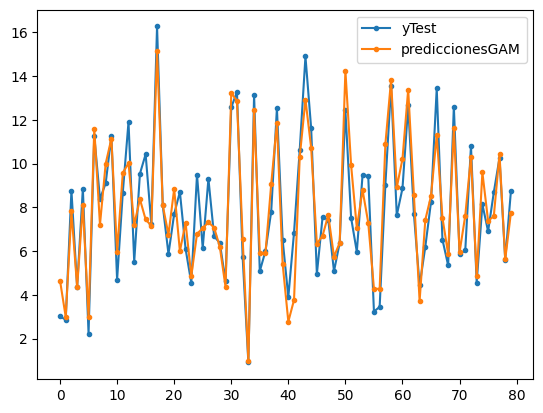

In [ ]:
# crear una grafica para ver predicciones vs reales
ejeX = np.arange(0,len(y_test))
plt.plot(ejeX, y_test, label='yTest', marker = 'o', markersize = '3')
plt.plot(ejeX, prediccionesGAM, label='prediccionesGAM', marker = 'o', markersize = '3')
plt.legend()
plt.show()

**Conclusión**

(4.a) GAM para predecir “Sales”

El modelo completo incluye CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban y US, con splines para las numéricas y factores para las categóricas.

(4.b) Efectos de Price, Income y Advertising

Price: La relación parcial tiende a ser negativa; a mayor precio, menor venta.
Income: Efecto positivo (aunque con una forma no lineal).
Advertising: Incrementar publicidad aumenta las ventas.

(4.c) Teoría de excluir Price y Population

Al eliminar Price y Population, el AIC sube a 1665.71, muy por encima de 971.66.
Conclusión: Mantenerlas mejora el modelo; no deben ser excluidas.

(4.d) Efecto de Income lineal vs. no lineal

El modelo con Income spline alcanza un AIC de 971.66;
Forzar linealidad sube a 974.86, un empeoramiento.
Conclusión: Income no lineal es (ligeramente) mejor.
En definitiva, el mejor modelo (entre los considerados) es el modelo completo con Income no lineal y sin excluir Price ni Population, puesto que exhibe el AIC más bajo (971.66).

### 5. Concluir sobre la capacidad predictiva de los modelos (10 puntos)
¿Cuál modelo de los estimados en los apartados 2, 3.a y 4.a resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

In [ ]:
mse_mejor_modelo_lineal = MSELASSO
mseGAM = MSEGAM
print("MSE del modelo lineal:", mse_mejor_modelo_lineal)
print("MSE del modelo GAM:", mseGAM)
print("MSE del modelo MARS: 1.1867")

MSE del modelo lineal: 1.2456748660509611
MSE del modelo GAM: 1.4591886025543406
MSE del modelo MARS: 1.1867


#### **ANALISIS Y CONCLUSIONES**

Tras la aplicación de diferentes modelos de predicción, se evaluó su desempeño utilizando el Error Cuadrático Medio (MSE) como métrica principal. En la primera etapa, se compararon los modelos PCA, PLS y LASSO, donde LASSO obtuvo el menor MSE (1.24), indicando una mejor capacidad predictiva en comparación con los otros dos modelos.

* PCA: 1.78
* PLS: 1.26
* LASSO: 1.24

Dado que LASSO mostró el mejor desempeño en esta primera fase, se utiliza para comparación con modelos no lineales: GAM (Generalized Additive Models) y MARS (Multivariate Adaptive Regression Splines). Los resultados fueron los siguientes:

* LASSO: 1.24
* GAM: 1.49
* MARS: 1.186

El modelo MARS presentó el menor MSE (1.186), superando a LASSO y GAM, lo que sugiere que es el modelo con mejor capacidad predictiva en este caso.

Para concluir, LASSO es una opción eficiente al manejar la selección de variables y reducir la dimensionalidad, lo que ayuda a prevenir el sobreajuste. Sin embargo, MARS ofrece una mejor capacidad de modelado al capturar relaciones no lineales de manera más flexible, lo que explica su menor MSE.